<a href="https://colab.research.google.com/github/VarunNangalia/Greyatom-Course/blob/master/Day_8_Stats.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
#Train

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline # to plot data which is further going to be coded

pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 500)
pd.set_option('display.width', 1000)

mdf = pd.read_csv('train.csv')
df.describe()

UsageError: unrecognized arguments: # to plot data which is further going to be coded


In [0]:
import pandas_profiling as pp
pp.ProfileReport(df)

/usr/local/lib/python3.6/dist-packages/pandas_profiling/describe.py:392: FutureWarning: The join_axes-keyword is deprecated. Use .reindex or .reindex_like on the result to achieve the same functionality.
  variable_stats = pd.concat(ldesc, join_axes=pd.Index([names]), axis=1)


Number of variables,81
Number of observations,1460
Total Missing (%),5.9%
Total size in memory,924.0 KiB
Average record size in memory,648.1 B
Numeric,38
Categorical,43
Boolean,0
Date,0
Text (Unique),0
Rejected,0


In [0]:
df.dtypes

Id                 int64
MSSubClass         int64
MSZoning          object
LotFrontage      float64
LotArea            int64
Street            object
Alley             object
LotShape          object
LandContour       object
Utilities         object
LotConfig         object
LandSlope         object
Neighborhood      object
Condition1        object
Condition2        object
BldgType          object
HouseStyle        object
OverallQual        int64
OverallCond        int64
YearBuilt          int64
YearRemodAdd       int64
RoofStyle         object
RoofMatl          object
Exterior1st       object
Exterior2nd       object
MasVnrType        object
MasVnrArea       float64
ExterQual         object
ExterCond         object
Foundation        object
BsmtQual          object
BsmtCond          object
BsmtExposure      object
BsmtFinType1      object
BsmtFinSF1         int64
BsmtFinType2      object
BsmtFinSF2         int64
BsmtUnfSF          int64
TotalBsmtSF        int64
Heating           object


In [0]:
import seaborn as sns

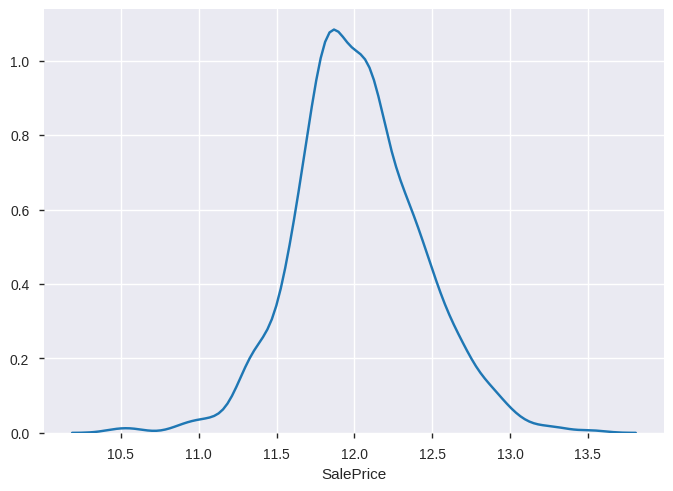

In [0]:
log_dist= sns.distplot(np.log(df['SalePrice']),hist = False)
plt.show()

In [0]:
#log_dist.skew()
x=df['SalePrice'].skew()
print(x)
y=np.log(df['SalePrice']).skew()
print(y)

1.8828757597682129
0.12133506220520406


In [0]:
(sale_corr=df.corr()['SalePrice'].sort_values()[::-1]

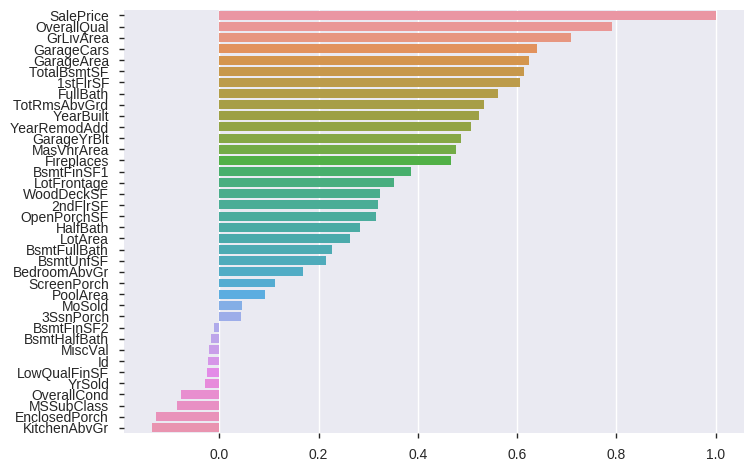

In [0]:
sns.barplot(x=sale_corr.values,y=sale_corr.index)


In [0]:
Quality_Saleprice= df.groupby(['OverallQual'])['SalePrice'].mean()
print(Quality_Saleprice)

OverallQual
1      50150.000000
2      51770.333333
3      87473.750000
4     108420.655172
5     133523.347607
6     161603.034759
7     207716.423197
8     274735.535714
9     367513.023256
10    438588.388889
Name: SalePrice, dtype: float64


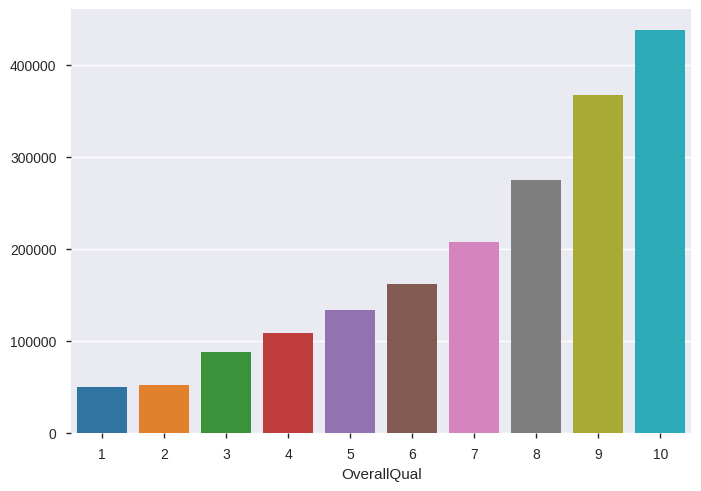

In [0]:
sns.barplot(x=Quality_Saleprice.index,y=Quality_Saleprice.values)

In [0]:
data = df[["GrLivArea", "SalePrice"]]
data_log = np.log(df[["GrLivArea", "SalePrice"]])

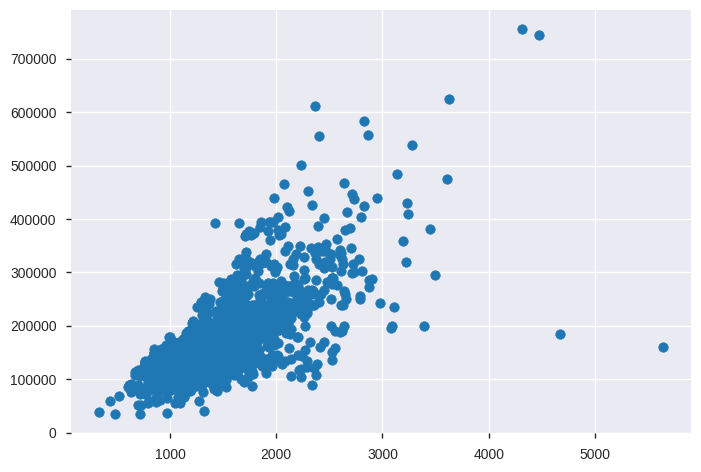

In [0]:
plt.scatter(data["GrLivArea"],data["SalePrice"])


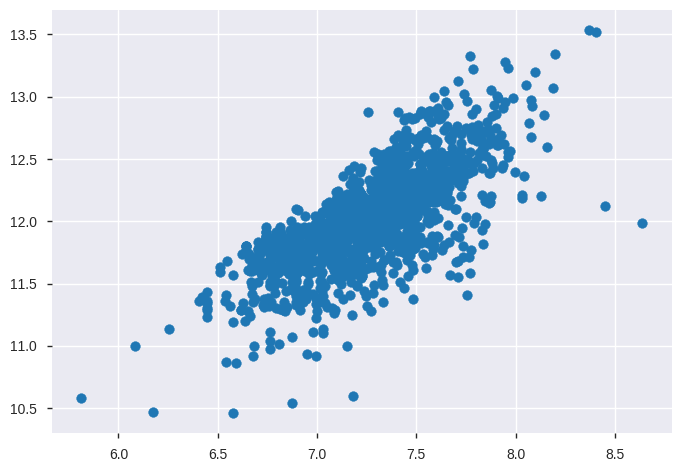

In [0]:
plt.scatter(data_log["GrLivArea"],data_log["SalePrice"]) # Log sunction is used to reduce Skweness


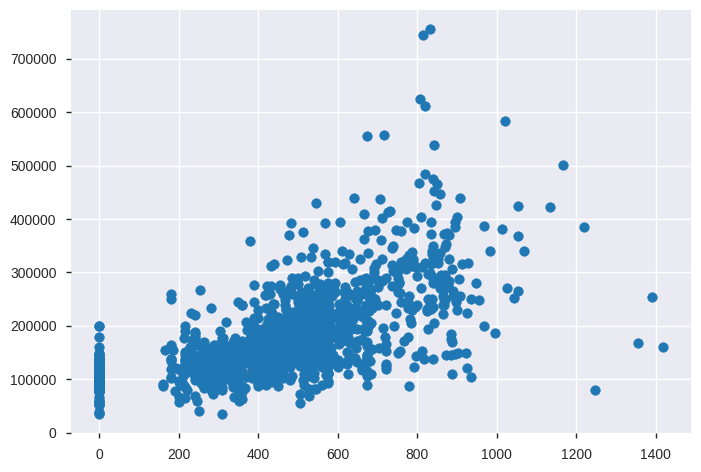

In [0]:
data2 = df[["GarageArea", "SalePrice"]]
plt.scatter(data2["GarageArea"],data2["SalePrice"])

         

In [0]:
data3 = df[df['GarageArea'] > 0][["GarageArea", "SalePrice"]]
print(data3)

      GarageArea  SalePrice
0            548     208500
1            460     181500
2            608     223500
3            642     140000
4            836     250000
...          ...        ...
1455         460     175000
1456         500     210000
1457         252     266500
1458         240     142125
1459         276     147500

[1379 rows x 2 columns]


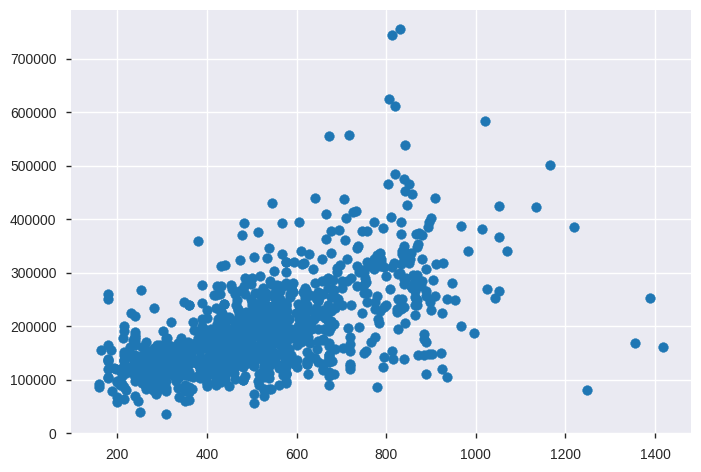

In [0]:

plt.scatter(data3['GarageArea'],data3['SalePrice'])

         

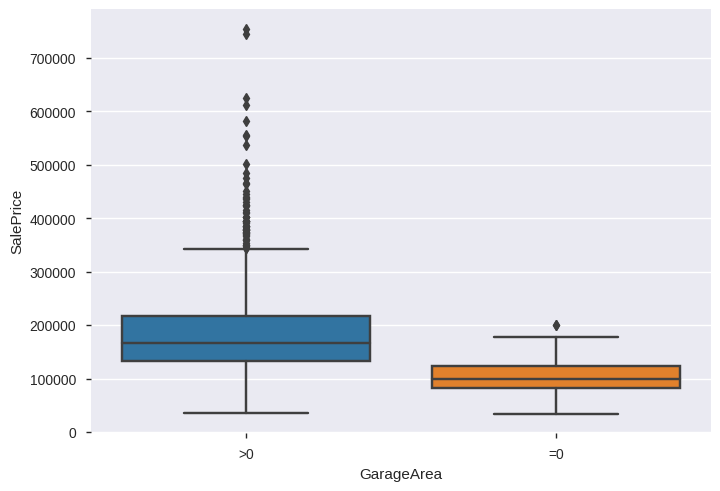

In [0]:
data_tmp = pd.DataFrame(columns=["GarageArea", "SalePrice"])
for garage_area, sale_price in df[["GarageArea", "SalePrice"]].values:
    data_tmp = data_tmp.append(pd.DataFrame([[">0" if garage_area > 0 else "=0", sale_price]], columns=data_tmp.columns))
data_tmp["SalePrice"] = data_tmp["SalePrice"].apply(float)
sns.boxplot(x="GarageArea", y="SalePrice", data=data_tmp)
plt.show()

#Alternate way - df2 = df[df['GarageArea']==0]['SalePrice']
#df3 = df[df['GarageArea']>0]['SalePrice']
#plt.boxplot([df2,df3])

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24]),
 <a list of 25 Text xticklabel objects>)

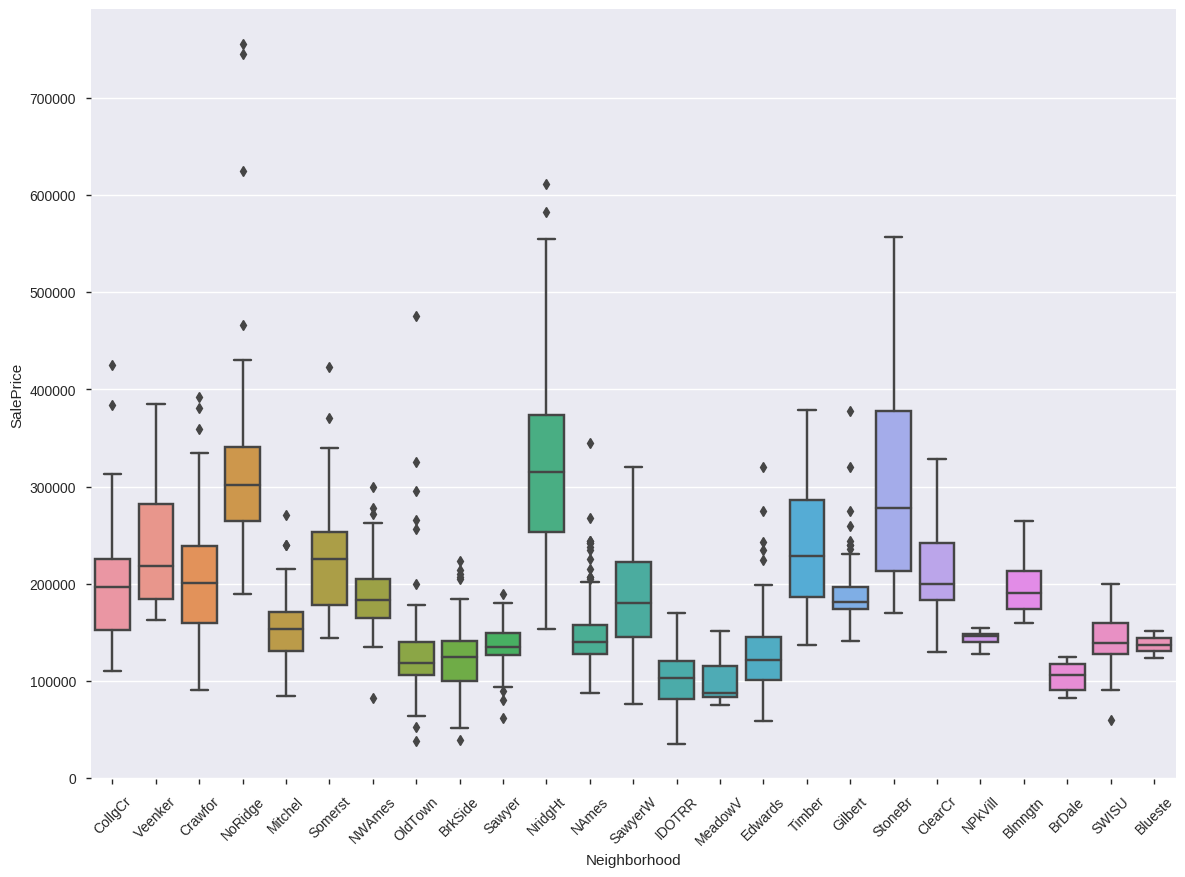

In [0]:
plt.figure(figsize=(14,10))
sns.boxplot(x = "Neighborhood",y="SalePrice",data = df)

plt.xticks(rotation=45)

In [0]:
nulls = pd.DataFrame(df.isnull().sum().sort_values(ascending=False))
nulls.columns = ["Null count"]
nulls["Unique"] = df[nulls.index].nunique()
nulls["dtype"] = df[nulls.index].dtypes
nulls[nulls["Null count"] > 0]

,Null count,Unique,dtype
PoolQC,1453,3,object
MiscFeature,1406,4,object
Alley,1369,2,object
Fence,1179,4,object
FireplaceQu,690,5,object
LotFrontage,259,110,float64
GarageCond,81,5,object
GarageType,81,6,object
GarageYrBlt,81,97,float64
GarageFinish,81,3,object


In [0]:
df['SalePrice'].kurt()#Kurtosis - It is used to check the Variablitiy of the data

6.536281860064529

(array([  0,   1,   2,   3,   4,   5,   6,   7,   8,   9,  10,  11,  12,
         13,  14,  15,  16,  17,  18,  19,  20,  21,  22,  23,  24,  25,
         26,  27,  28,  29,  30,  31,  32,  33,  34,  35,  36,  37,  38,
         39,  40,  41,  42,  43,  44,  45,  46,  47,  48,  49,  50,  51,
         52,  53,  54,  55,  56,  57,  58,  59,  60,  61,  62,  63,  64,
         65,  66,  67,  68,  69,  70,  71,  72,  73,  74,  75,  76,  77,
         78,  79,  80,  81,  82,  83,  84,  85,  86,  87,  88,  89,  90,
         91,  92,  93,  94,  95,  96,  97,  98,  99, 100, 101, 102, 103,
        104, 105, 106, 107, 108, 109, 110, 111]),
 <a list of 112 Text xticklabel objects>)

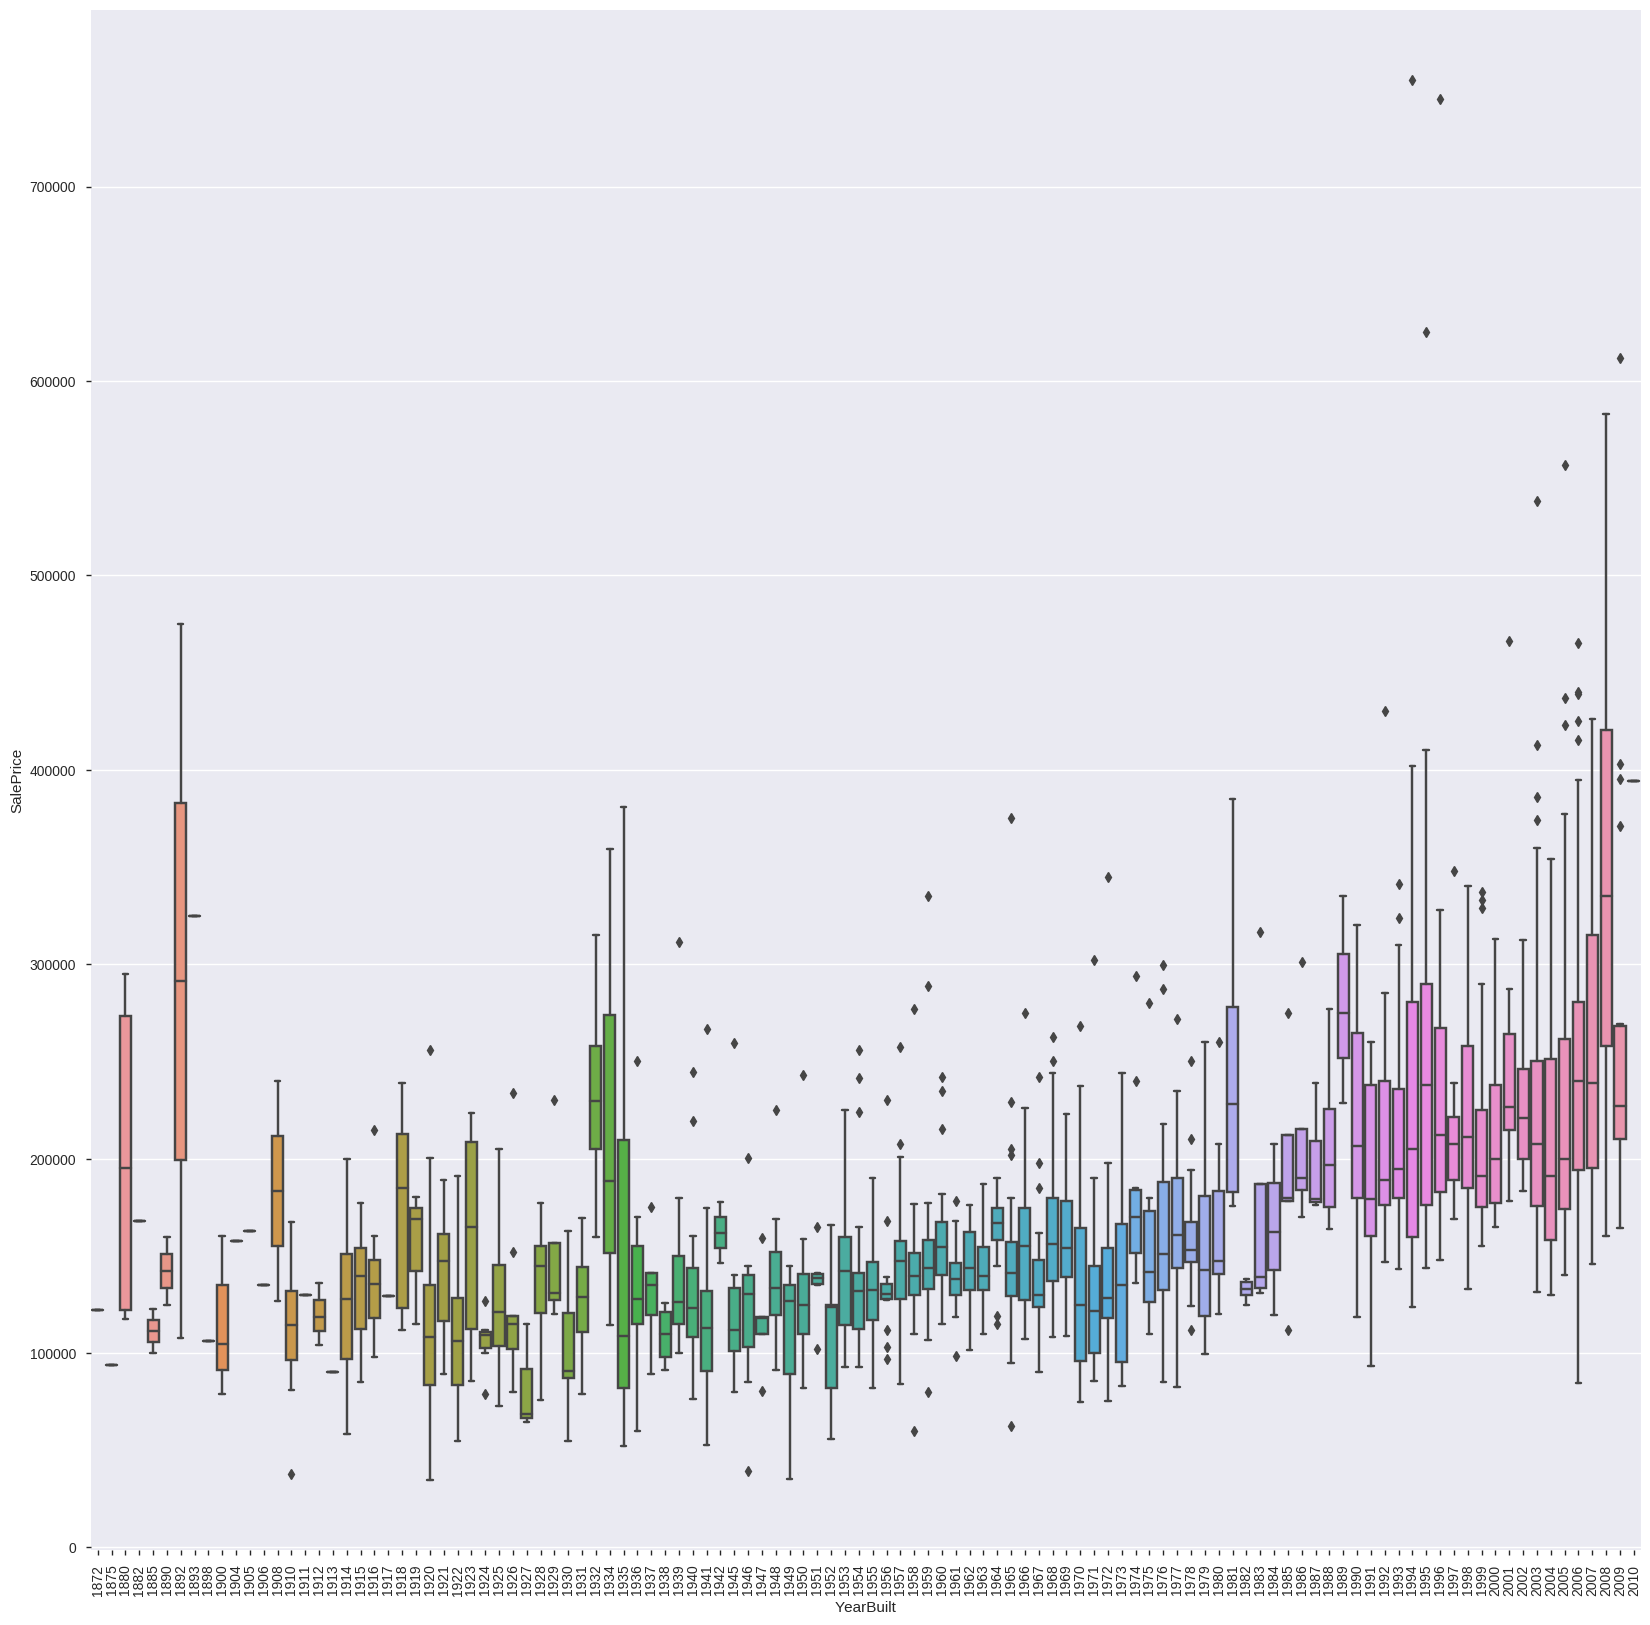

In [0]:
plt.figure(figsize=(20,20))
sns.boxplot(x = "YearBuilt",y="SalePrice",data = df)

plt.xticks(rotation=90)

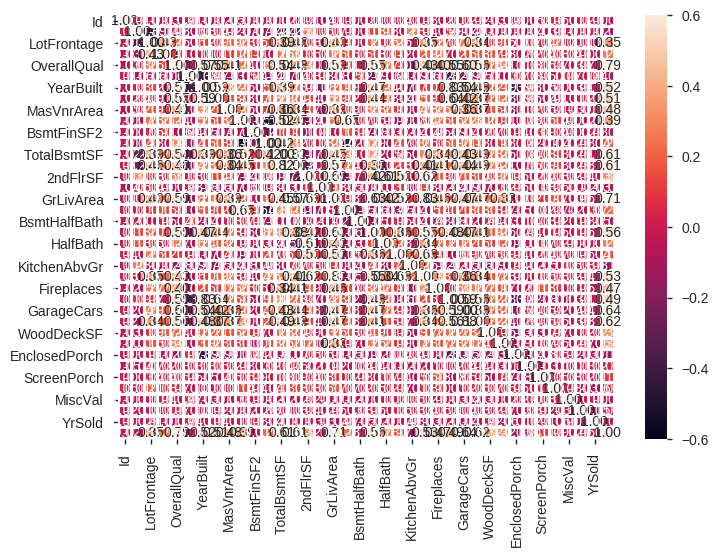

In [0]:
import seaborn as sns

sns.heatmap(df.corr(),linewidths=1.5,vmax=0.6,vmin=-0.6,cbar=True,annot=True, fmt='.2f')

/usr/local/lib/python3.6/dist-packages/seaborn/axisgrid.py:2079: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


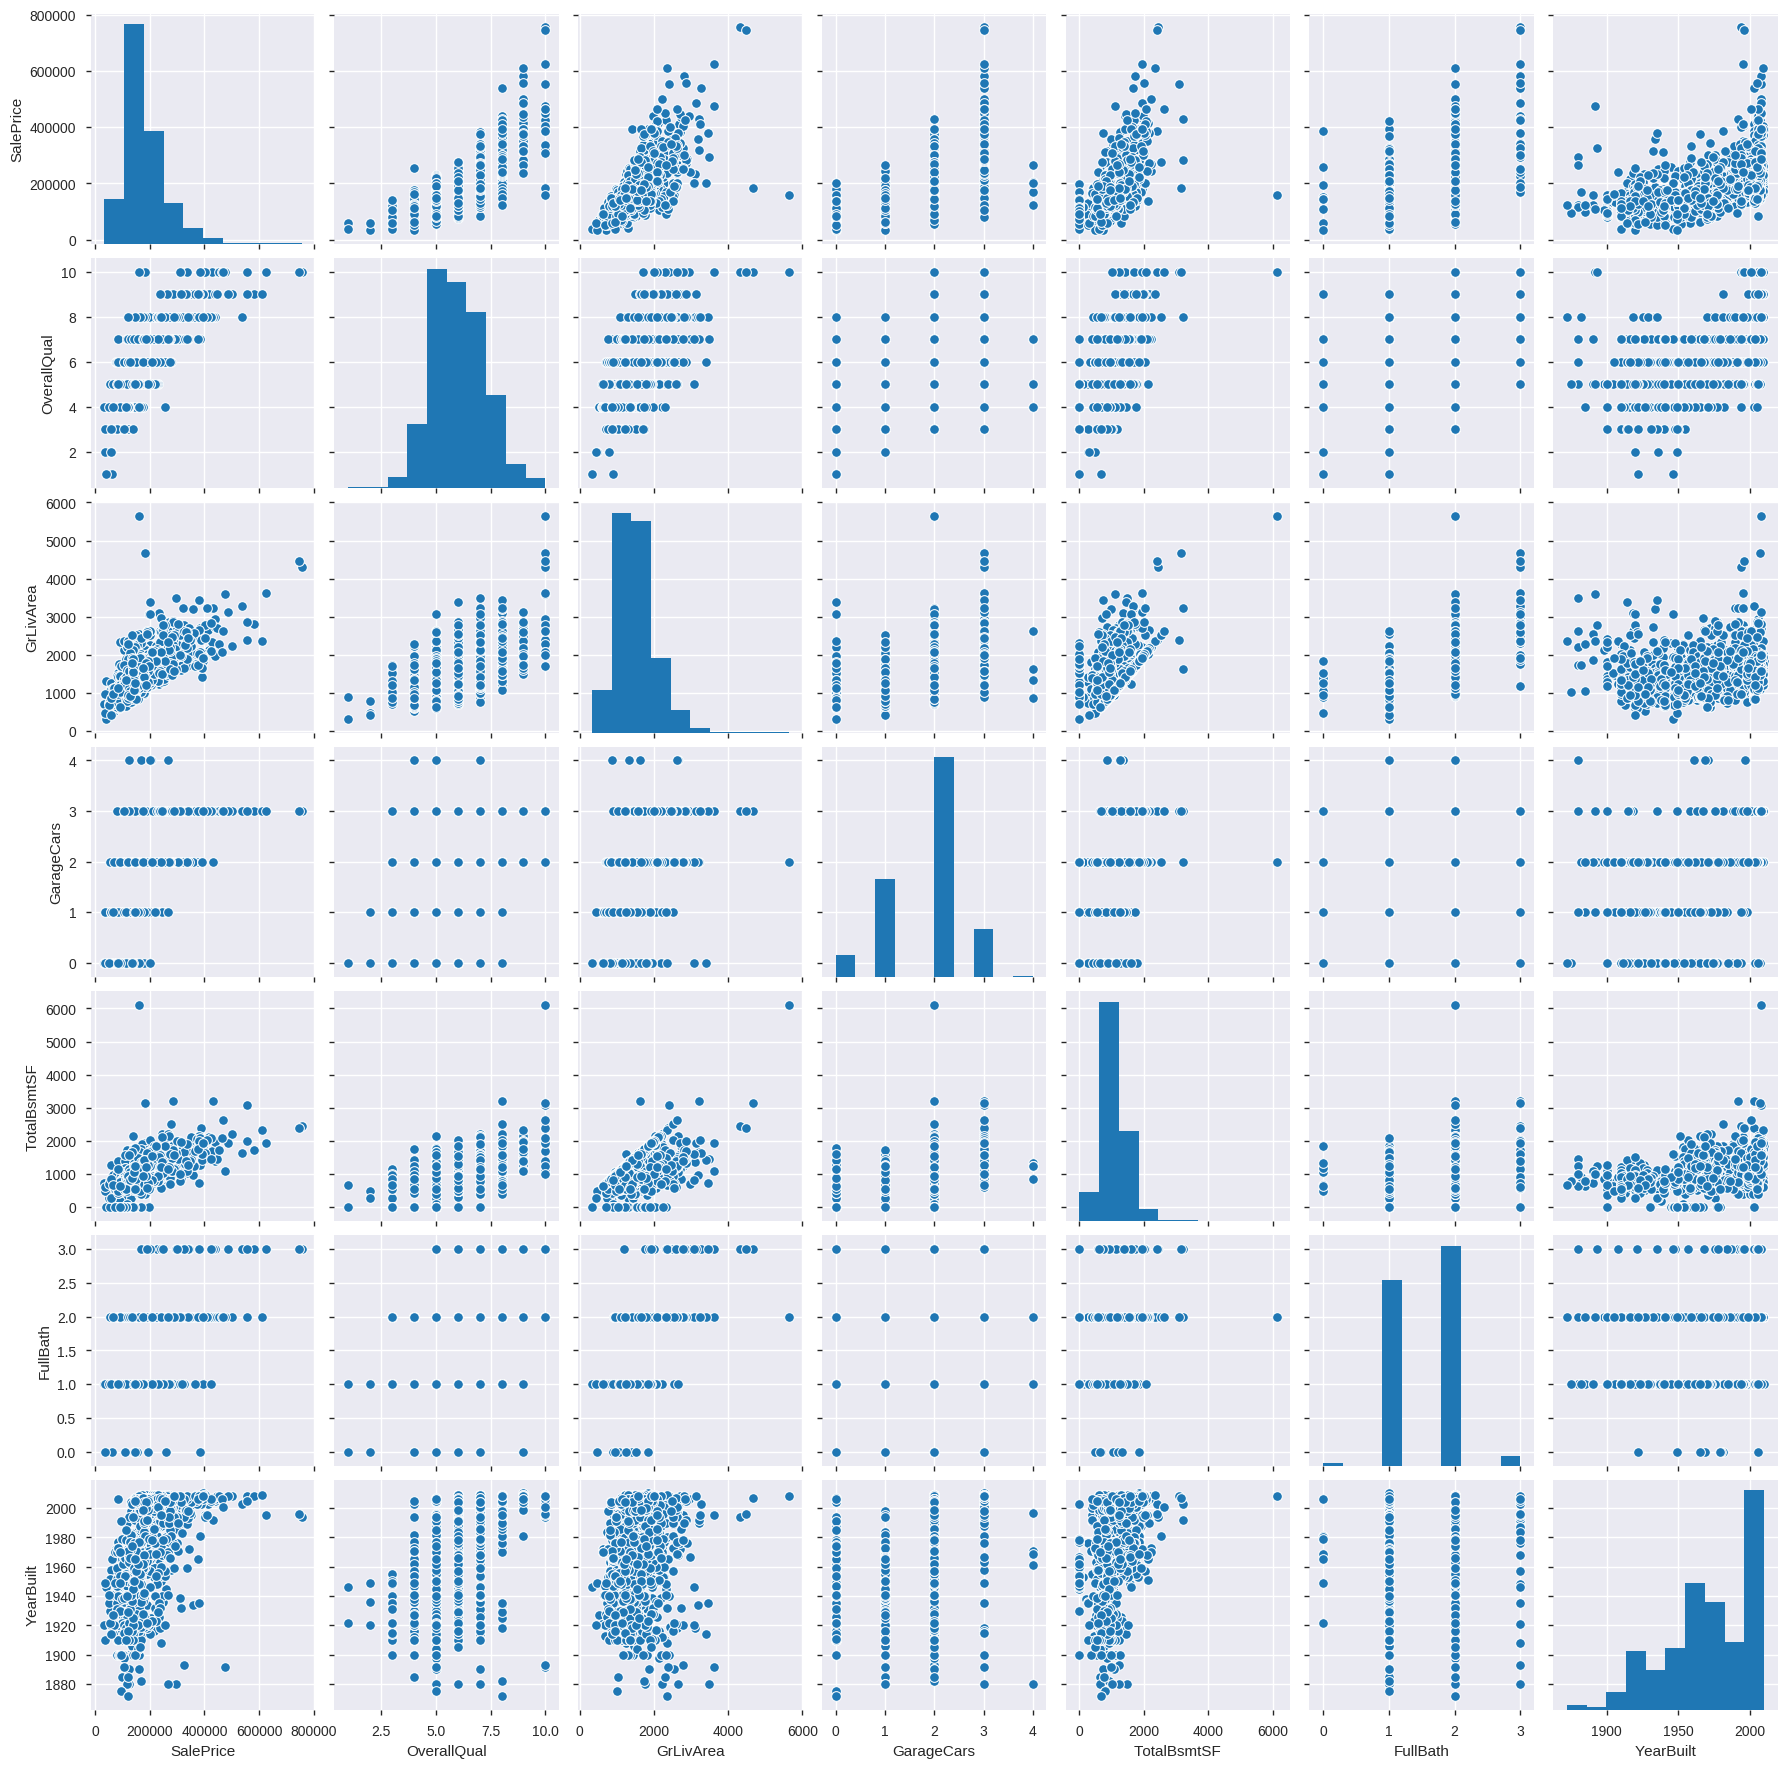

In [0]:
#Pairplot
sns.pairplot(df[['SalePrice', 'OverallQual', 'GrLivArea', 'GarageCars', 'TotalBsmtSF', 'FullBath', 'YearBuilt']],size = 2.5)

In [0]:
total = df.isnull().sum().sort_values(ascending=False)
percent = (df.isnull().sum()/df.isnull().count()).sort_values(ascending=False)
missing_data = pd.concat([total, percent], axis=1, keys=['Total', 'Percent'])
missing_data.head(20)

,Total,Percent
PoolQC,1453,0.995205
MiscFeature,1406,0.963014
Alley,1369,0.937671
Fence,1179,0.807534
FireplaceQu,690,0.472603
LotFrontage,259,0.177397
GarageCond,81,0.055479
GarageType,81,0.055479
GarageYrBlt,81,0.055479
GarageFinish,81,0.055479


In [0]:
no_missing_data = df.dropna()

In [0]:
no_missing_data

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice


(array([871., 508.,  70.,   7.,   4.]),
 array([ 34900., 178920., 322940., 466960., 610980., 755000.]),
 <a list of 5 Patch objects>)

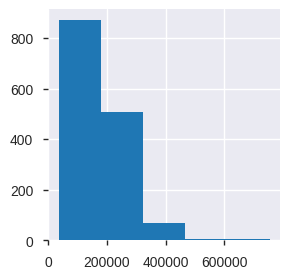

In [0]:
plt.figure(figsize=(3,3))
plt.hist(df['SalePrice'],bins = 5)


(array([148., 723., 373., 135.,  51.,  19.,   4.,   3.,   2.,   2.]),
 array([ 34900., 106910., 178920., 250930., 322940., 394950., 466960.,
        538970., 610980., 682990., 755000.]),
 <a list of 10 Patch objects>)

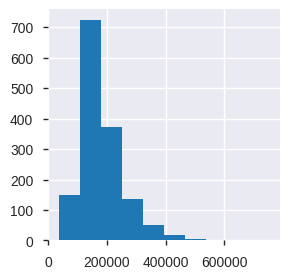

In [0]:
plt.figure(figsize=(3,3))
plt.hist(df['SalePrice'],bins = 10)

(array([ 49., 331., 491., 280., 151.,  77.,  34.,  25.,  11.,   3.,   3.,
          1.,   2.,   0.,   2.]),
 array([ 34900.        ,  82906.66666667, 130913.33333333, 178920.        ,
        226926.66666667, 274933.33333333, 322940.        , 370946.66666667,
        418953.33333333, 466960.        , 514966.66666667, 562973.33333333,
        610980.        , 658986.66666667, 706993.33333333, 755000.        ]),
 <a list of 15 Patch objects>)

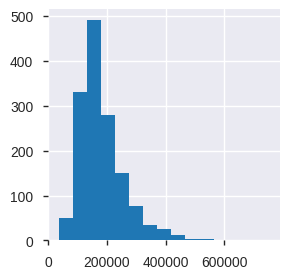

In [0]:
plt.figure(figsize=(3,3))
plt.hist(df['SalePrice'],bins = 15)